 Price Prediction (Regression)

1. Import and Macros

- Import the necessary libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sys
import pprint


#Removing warning messages to prevent cluttering of the output screen
import warnings
warnings.filterwarnings('ignore')

-  Macros to make the code more readable and unified

In [47]:
#########################################MACROS##############################################

#Macro for target variable
targetVar_MACRO='PRICE'

#Macros for start , end , and step for alpha range (readability)
alphaStart_MACRO = -(4)
alphaEnd_MACRO = 4
alphaSteps_MACRO = 10

#Macro for KFold split
kfoldSplit_MACRO = 5

#Macro for the indices used in modelStatsDict dictionary for the name of best feature type and value of best MSE/R2 scores
bestFeatureMethod_MACRO = 0
bestStatTestVal_MACRO = 1

2. Reading the Dataset

In [48]:
df1=pd.DataFrame(pd.read_excel("C:/Users/user/Downloads/Rental DataSet.xlsx"))

3. Data Exploration
    3.1 Data Dictionary
    -> data decription, data information

In [49]:
df1.shape

(1623, 29)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Case no.  1623 non-null   int64  
 1   REG       1623 non-null   object 
 2   ADD       1623 non-null   object 
 3   PRICE     1623 non-null   float64
 4   MIN       1623 non-null   int64  
 5   DISTRICT  1623 non-null   object 
 6   DINDEX    1623 non-null   float64
 7   BEDS      1623 non-null   int64  
 8   M2        1623 non-null   int64  
 9   TV        1623 non-null   int64  
 10  WASHM     1623 non-null   int64  
 11  BALCONY   1623 non-null   int64  
 12  TERRACE   1623 non-null   int64  
 13  CRTYD     1623 non-null   int64  
 14  VIEWS     1623 non-null   int64  
 15  SND       1623 non-null   int64  
 16  PARK      1623 non-null   int64  
 17  PETS      1623 non-null   int64  
 18  POOL      1623 non-null   int64  
 19  BATH      1623 non-null   int64  
 20  CAL       1623 non-null   floa

3. Data Exploration

    3.1 Data Dictionary
    -> data decription, data information
    
    3.2 Data Features and label exploration
    -> Rename column CAL according to the Data Dictionary
    -> Removing columns 'Case no.','REG','ADD' as they serve only for Identification Purpose for the dataframe
    -> 'DISTRICT' column is dropped as DINDEX feature is present. Data Dictionary explains that DINDEX accounts for the district and -------
    -> storing the latest dataframe in df2
    

In [51]:
df1.columns

Index(['Case no.', 'REG', 'ADD', 'PRICE', 'MIN', 'DISTRICT', 'DINDEX', 'BEDS',
       'M2', 'TV', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND',
       'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE',
       'LSWD', 'LSWE', 'SE1', 'SE2'],
      dtype='object')

In [52]:
df1=df1.rename(columns={'CAL':'RAT'})

In [53]:
df2=df1.drop(['Case no.','REG','ADD','DISTRICT'],axis=1)


3. Data Exploration

    3.1 Data Dictionary
    
    -> data decription, data information
    
    3.2 Data Features and label exploration
    
    -> Rename column CAL according to the Data Dictionary
    -> Removing columns 'Case no.','REG','ADD' as they serve only for Identification Purpose for the dataframe
    -> 'DISTRICT' column is dropped as DINDEX feature is present. Data Dictionary explains that DINDEX classifies the DISTRICTs according to price/m2
    -> storing the latest dataframe in df2
    
    3.3 Extract the label and features
    

In [54]:
label='PRICE'
features=[col for col in df2.columns if col!=label]
X=df2[features]
y=df2[label]

3. Data Exploration

    3.1 Data Dictionary
    
    -> data decription, data information
    
    3.2 Data Features and label exploration
    
    -> Rename column CAL according to the Data Dictionary
    -> Removing columns 'Case no.','REG','ADD' as they serve only for Identification Purpose for the dataframe
    -> 'DISTRICT' column is dropped as DINDEX feature is present. Data Dictionary explains that DINDEX accounts for the district and -------
    -> storing the latest dataframe in df2
    
    3.3 Extract the label and features
    
    3.4 Check for Numerical and Categorical Features

In [55]:
for col in X.columns:

    no_of_unique_values= df2[col].nunique()

    if no_of_unique_values < 8:
        unique_values =df2[col].unique()

        print(f" The column {col} has {no_of_unique_values} values: {unique_values} ")

    else:


        print(f" The column {col} has {no_of_unique_values} values")

 The column MIN has 44 values
 The column DINDEX has 10 values
 The column BEDS has 15 values
 The column M2 has 105 values
 The column TV has 2 values: [1 0] 
 The column WASHM has 2 values: [1 0] 
 The column BALCONY has 2 values: [1 0] 
 The column TERRACE has 2 values: [0 1] 
 The column CRTYD has 2 values: [1 0] 
 The column VIEWS has 2 values: [0 1] 
 The column SND has 2 values: [0 1] 
 The column PARK has 2 values: [0 1] 
 The column PETS has 2 values: [1 0] 
 The column POOL has 2 values: [0 1] 
 The column BATH has 2 values: [0 1] 
 The column RAT has 37 values
 The column PICS has 47 values
 The column VSAP has 9 values
 The column HSWD has 2 values: [0 1] 
 The column HSWE has 2 values: [0 1] 
 The column LSWD has 2 values: [1 0] 
 The column LSWE has 2 values: [0 1] 
 The column SE1 has 2 values: [0 1] 
 The column SE2 has 2 values: [0 1] 


In [56]:
Numerical_features=['MIN','DINDEX','BEDS','M2','RAT','PICS','VSAP']
Cat_features= [col for col in X.columns if col not in Numerical_features]

3. Data Exploration

    3.1 Data Dictionary
    
    -> data decription, data information
    
    3.2 Data Features and label exploration
    
    -> Rename column CAL according to the Data Dictionary
    -> Removing columns 'Case no.','REG','ADD' as they serve only for Identification Purpose for the dataframe
    -> 'DISTRICT' column is dropped as DINDEX feature is present. Data Dictionary explains that DINDEX accounts for the district and -------
    -> storing the latest dataframe in df2
    
    3.3 Extract the label and features
    
    3.4 Check for Numerical and Categorical Features


    3.5 Data Preprocessing
        3.5.1. Data Imputation- Check for null values
        -> No null values observed. So no need for Data Imputation
    
    

In [57]:
df2.isnull().sum()

PRICE      0
MIN        0
DINDEX     0
BEDS       0
M2         0
TV         0
WASHM      0
BALCONY    0
TERRACE    0
CRTYD      0
VIEWS      0
SND        0
PARK       0
PETS       0
POOL       0
BATH       0
RAT        0
PICS       0
VSAP       0
HSWD       0
HSWE       0
LSWD       0
LSWE       0
SE1        0
SE2        0
dtype: int64

4. Data Visualization
    
    4.1 CountPlots for Categorial Variables
    -> Distribution of Categorical Variables
    -> Variation of Categorical variables aganist Price


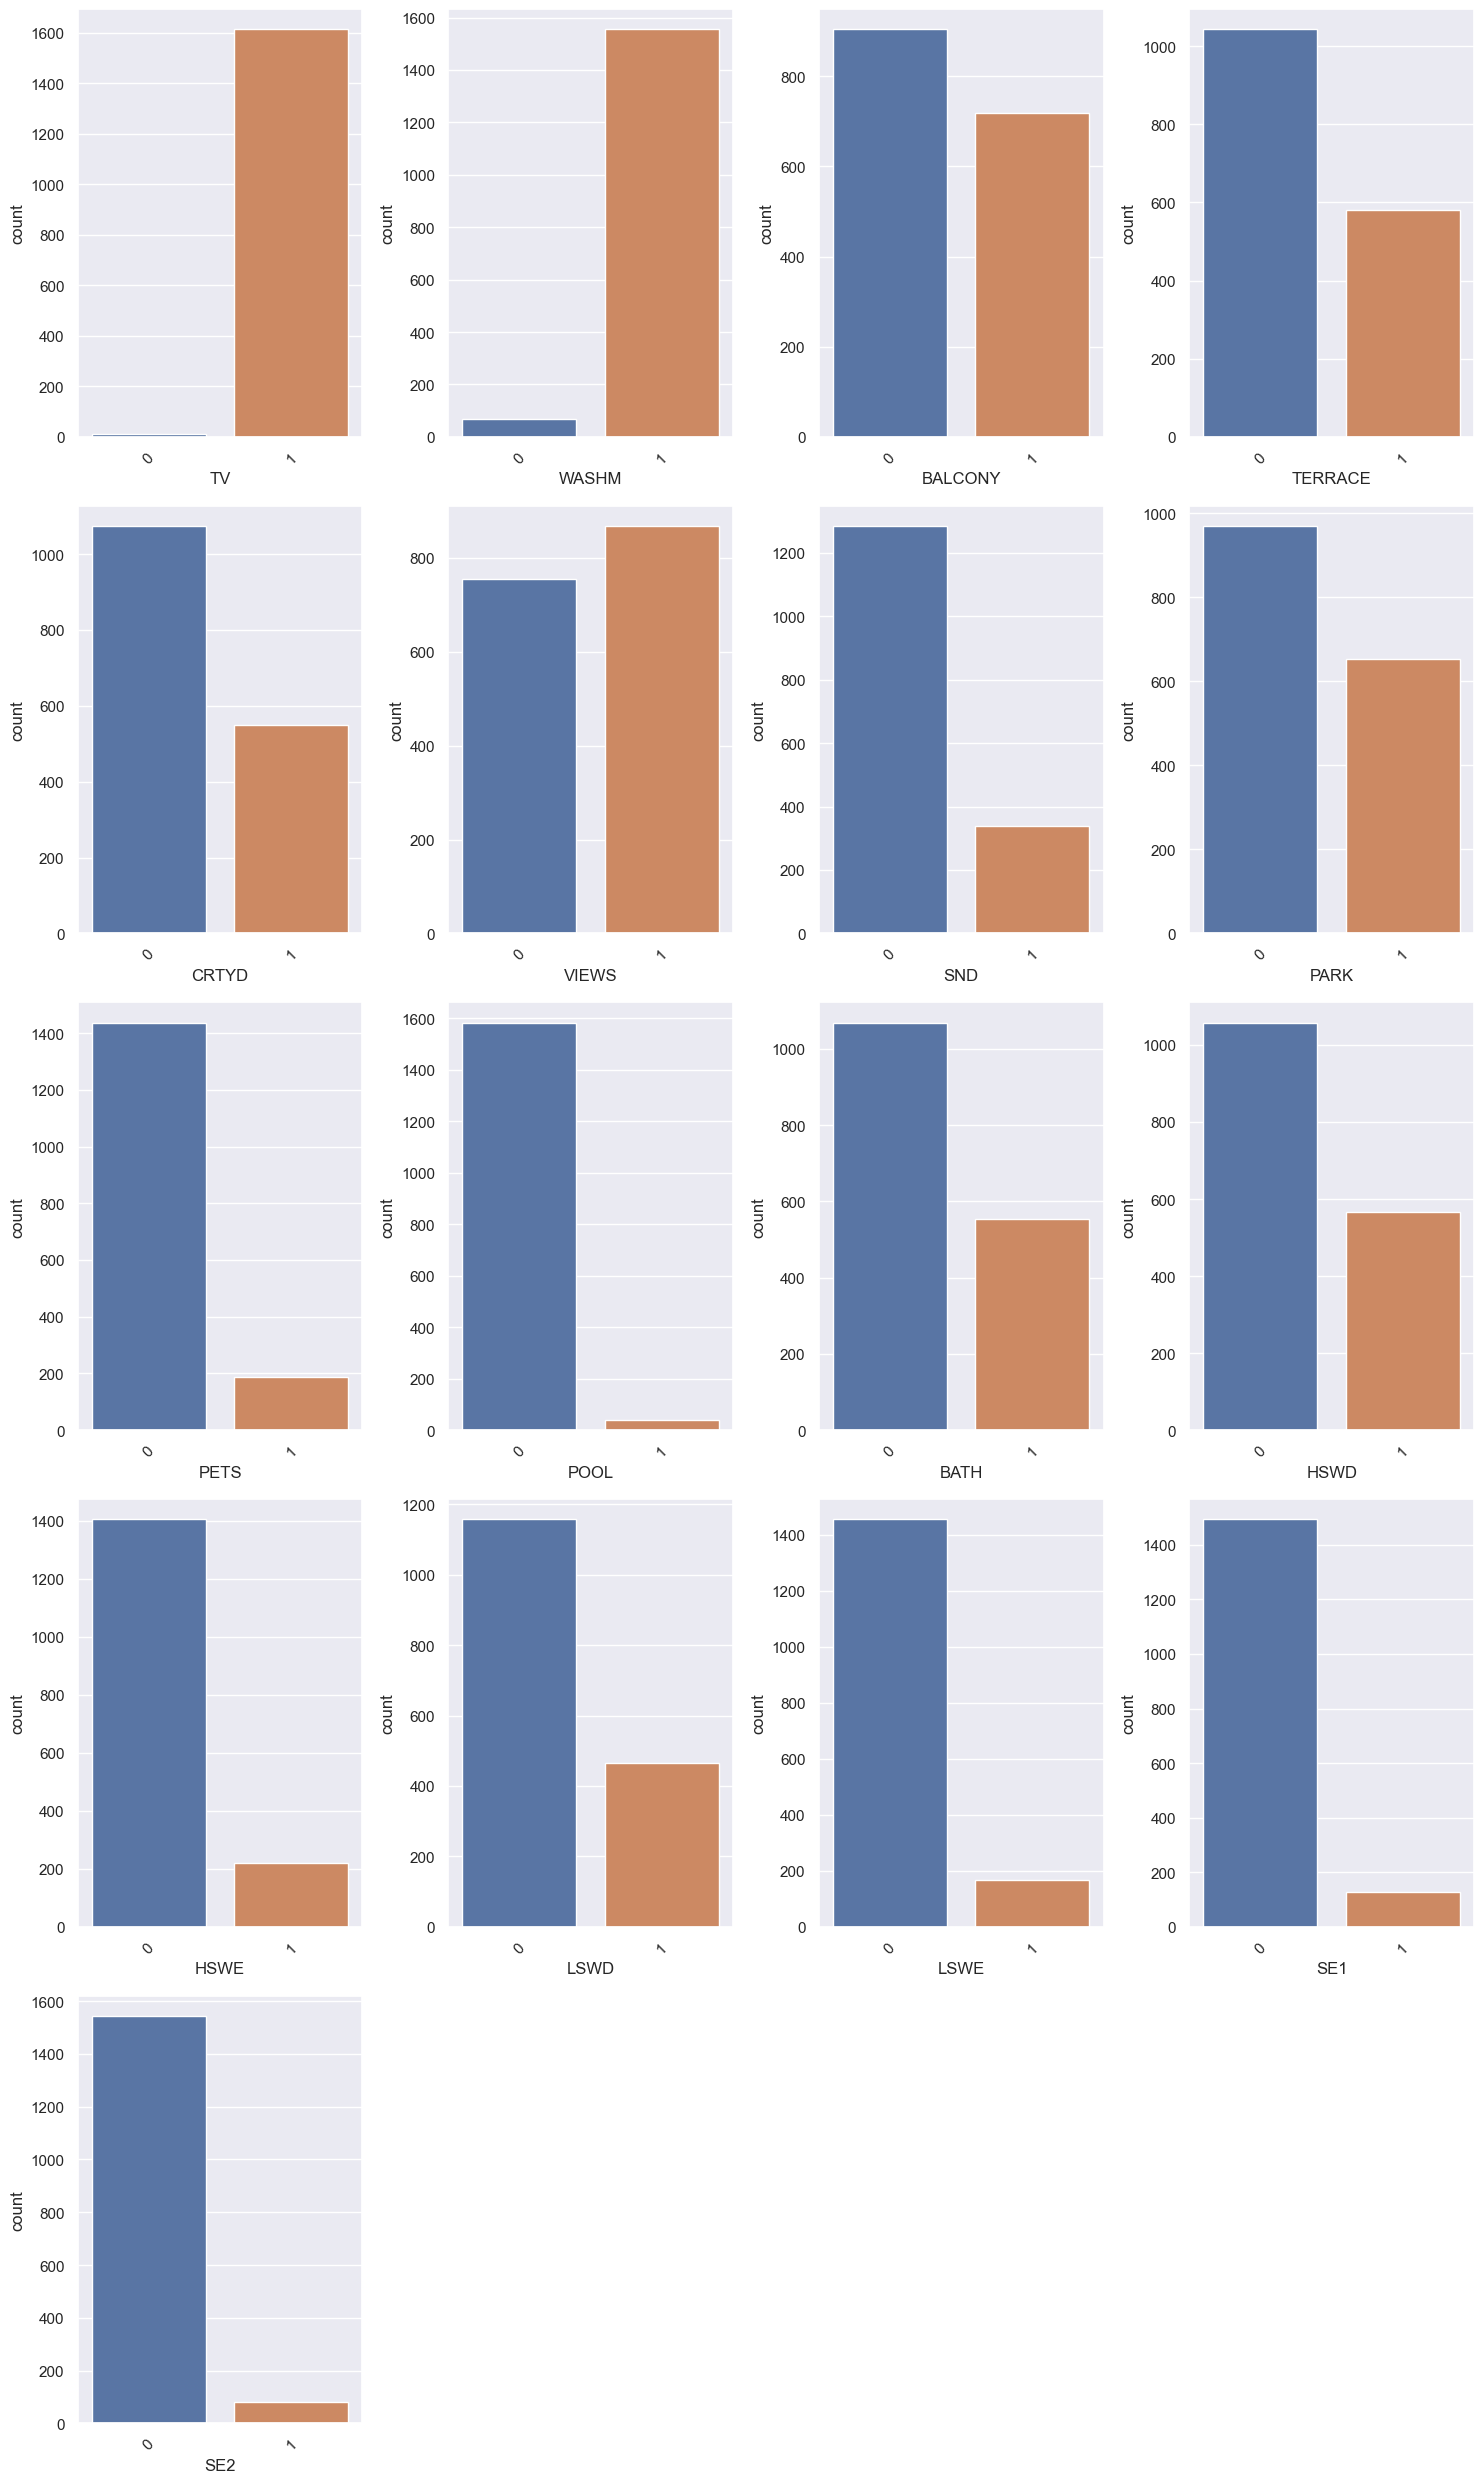

In [58]:
no_cat_features= len(Cat_features)
cat_columns=4
cat_rows =math.ceil(no_cat_features/cat_columns)

fig, axes = plt.subplots(cat_rows, cat_columns, figsize=(15, 5*cat_rows))
for i, no_cat_feature in enumerate(Cat_features):
    row, col = divmod(i, cat_columns)
    sns.countplot(data=df2, x= no_cat_feature, ax=axes[row, col])
    axes[row, col].tick_params(axis='x', labelrotation=45)

for i in range(len(Cat_features), cat_rows * cat_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

INSIGHTS-
Uneven Distribution of data is noticed except for columns 'BALCONY" and "VIEWS"

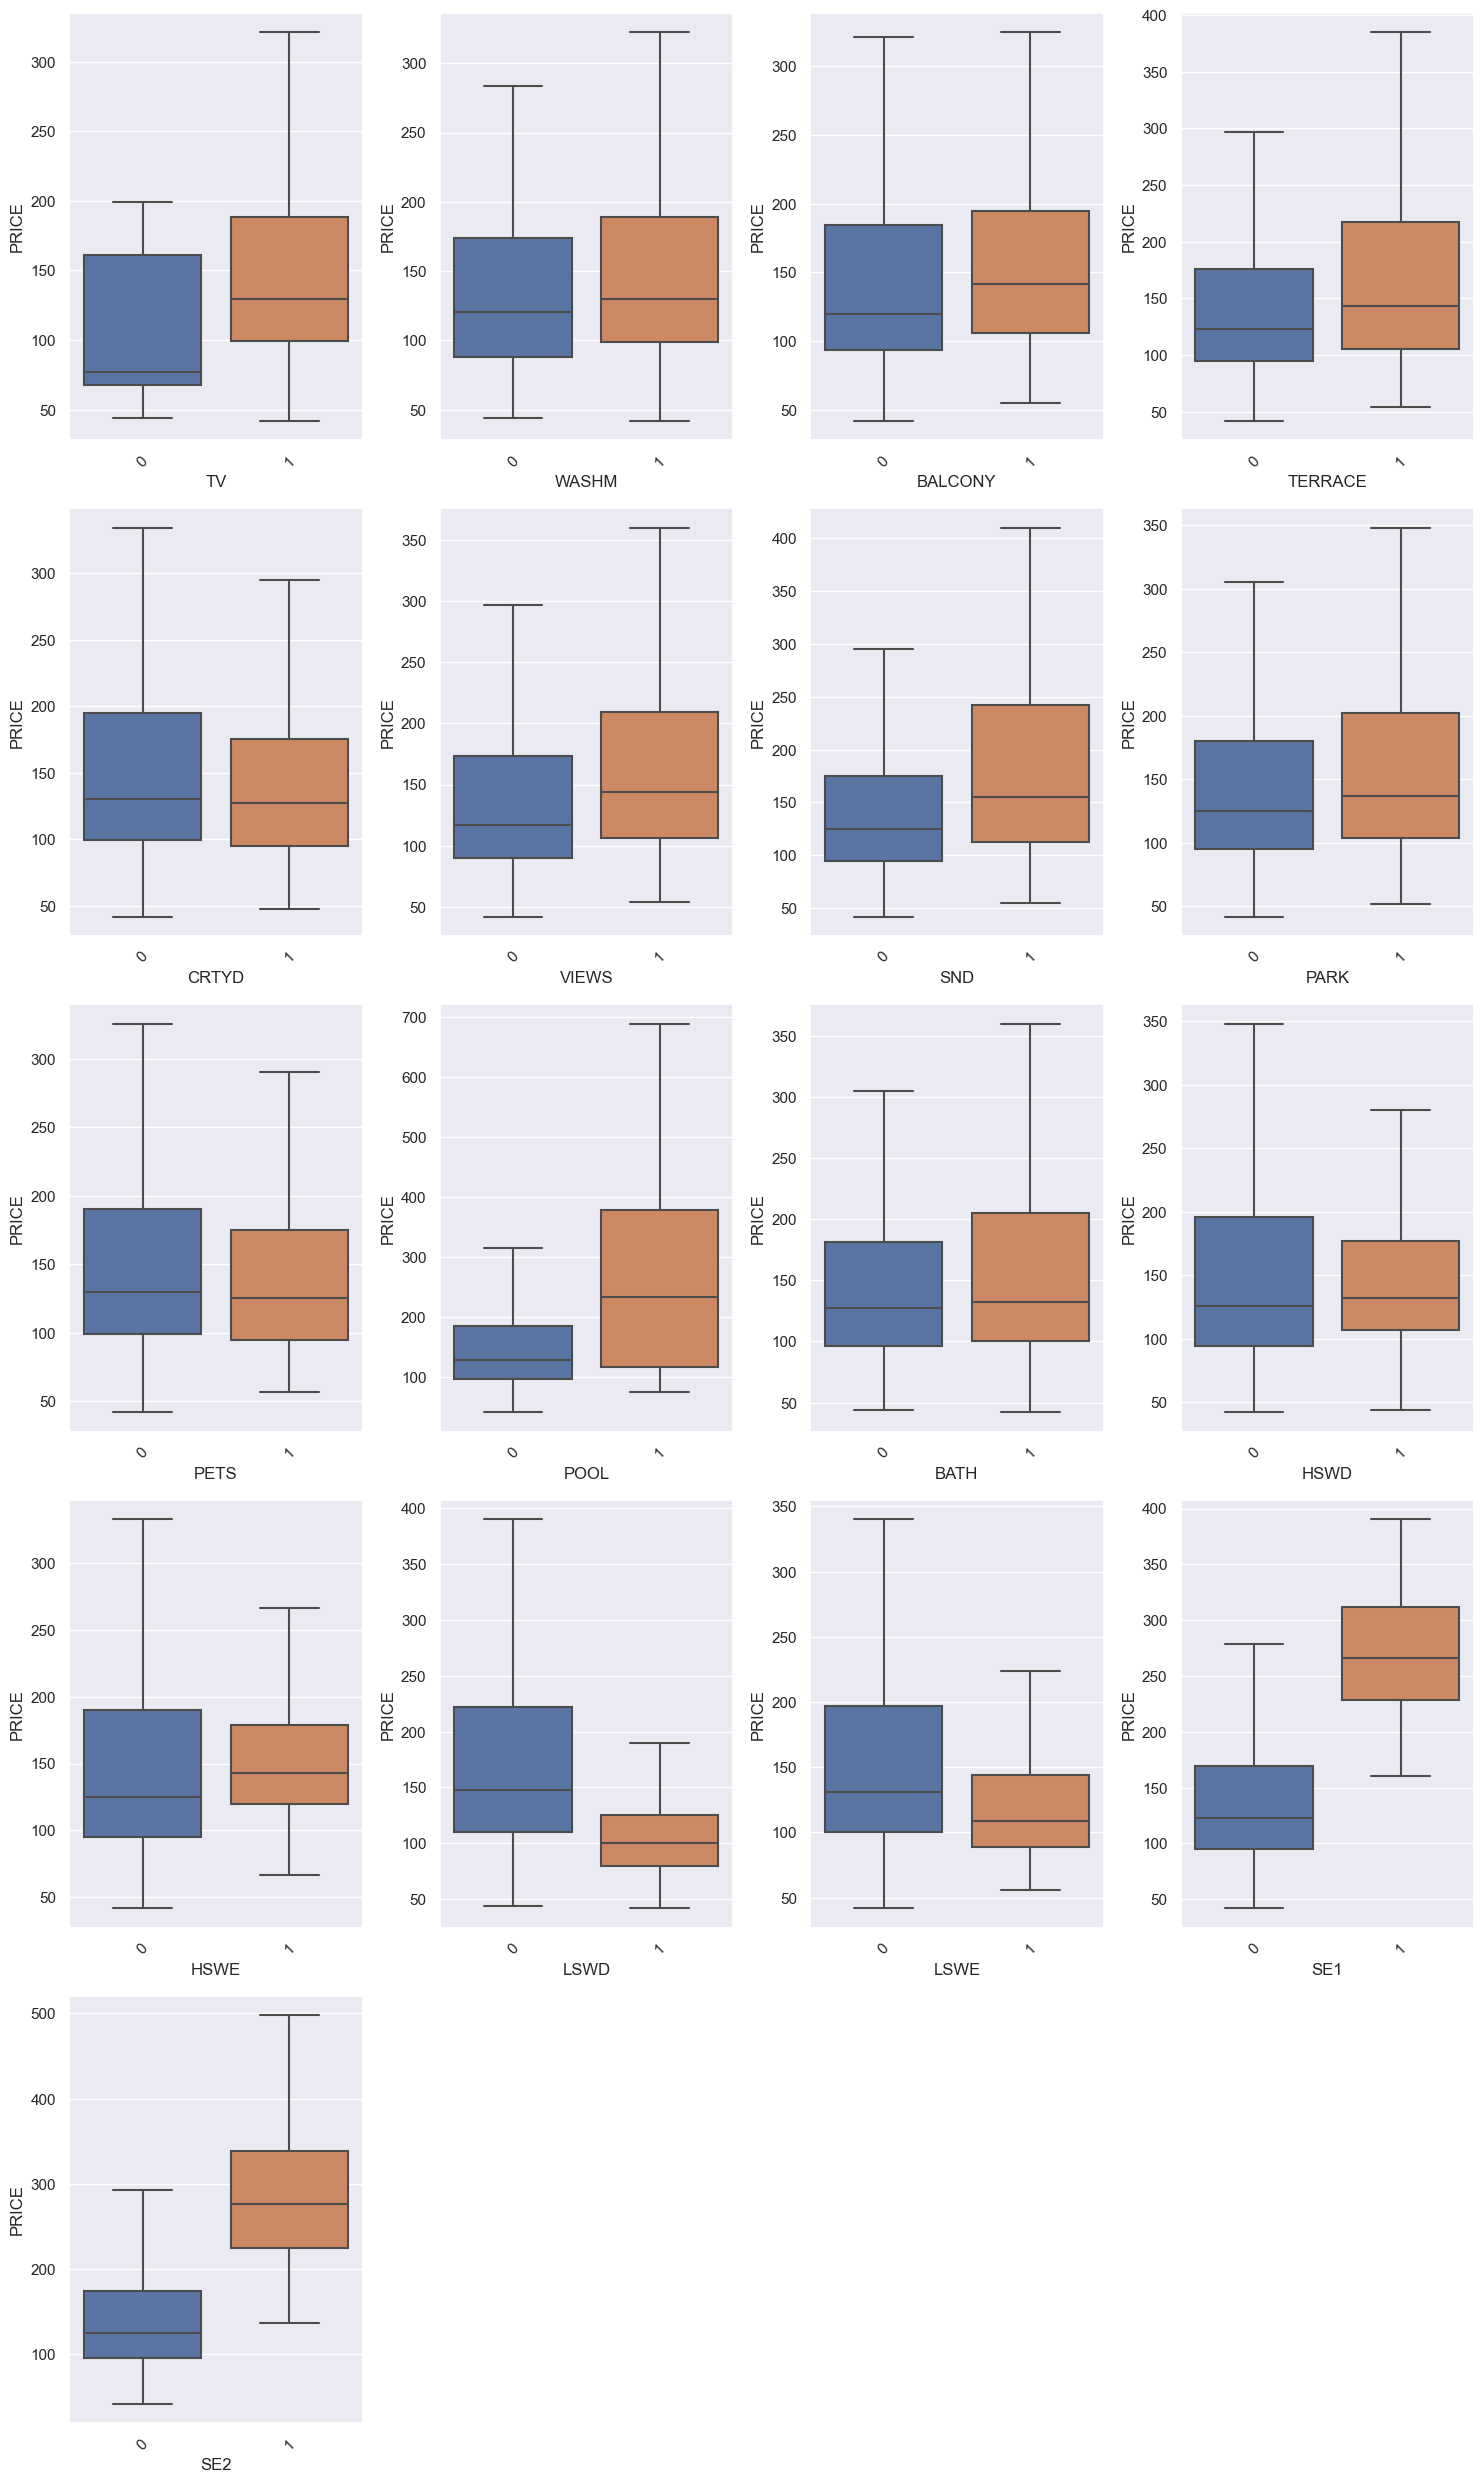

In [59]:
fig, axes = plt.subplots(cat_rows, cat_columns, figsize=(15, 5*cat_rows))
for i, cat_feature in enumerate(Cat_features):
    row, col = divmod(i, cat_columns)
    sns.boxplot(data=df2, y = "PRICE", x = cat_feature, ax=axes[row, col], showfliers=False)
    axes[row, col].tick_params(axis='x', labelrotation=45)

for i in range(len(Cat_features), cat_rows * cat_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

INSIGHTS-

"POOLS"- The presence of pool has pushed the price to 400
"SE1", "SE2" - Special Events 1 and 2 is driving the price high
"LSWD"- Price has dipped when it is Low Season Week Day

4. Data Visualization
    
    4.1 CountPlots for Categorial Variables
    -> Distribution of Categorical Variables
    -> Variation of Categorical variables aganist Price
    
    4.2 Visualization of Numerical Data
    -> split the discrete and continuous numerical values
    -> Variation of Discrete data aganist Price
    -> Variation of Continuous Numerical data aganist Price

In [60]:
dis_num=['DINDEX','BEDS','VSAP']
cont_num=[col for col in Numerical_features if col not in dis_num]
cont_num

['MIN', 'M2', 'RAT', 'PICS']

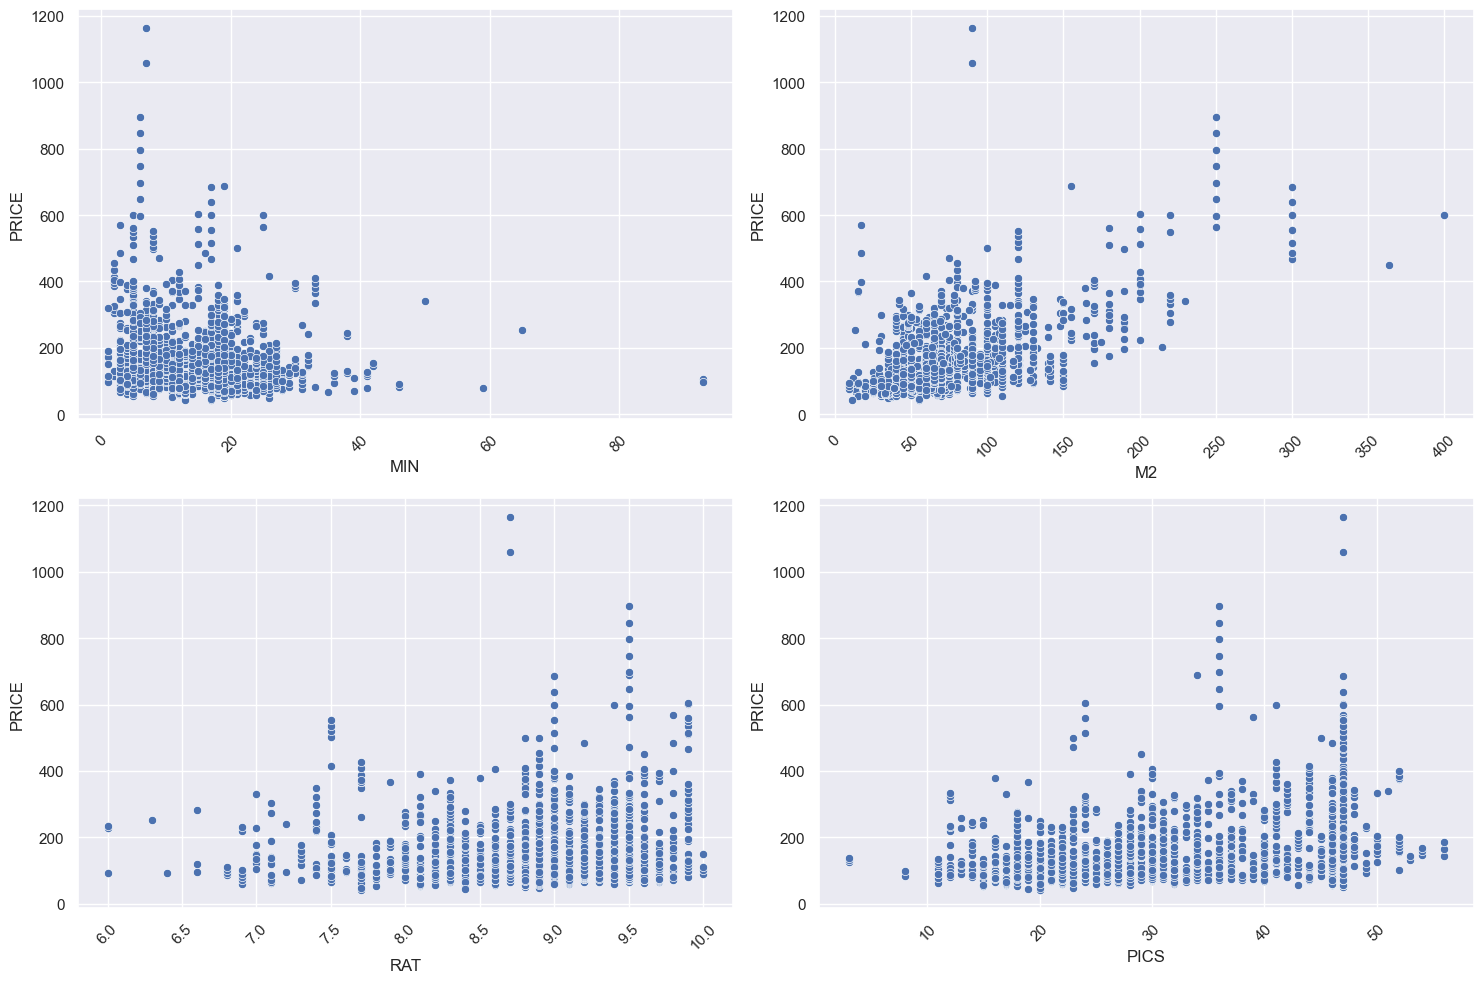

In [61]:
no_numerical_features= len(cont_num)
num_columns=2
num_rows =math.ceil(no_numerical_features/num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))
for i, num_feature in enumerate(cont_num):
    row, col = divmod(i, num_columns)
    sns.scatterplot(data=df2, y = "PRICE", x = num_feature, ax=axes[row, col])
    axes[row, col].tick_params(axis='x', labelrotation=45)

for i in range(len(cont_num), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

INSIGHTS
1."MIN"- Decrease in Minutes from Points of Interest, Price Increases
2."M2"- Increase in square footage of room, Price Increase
3."RAT"- Increase in ratings, Price Increase
4."PICS"- Increase in photos, Price Increase

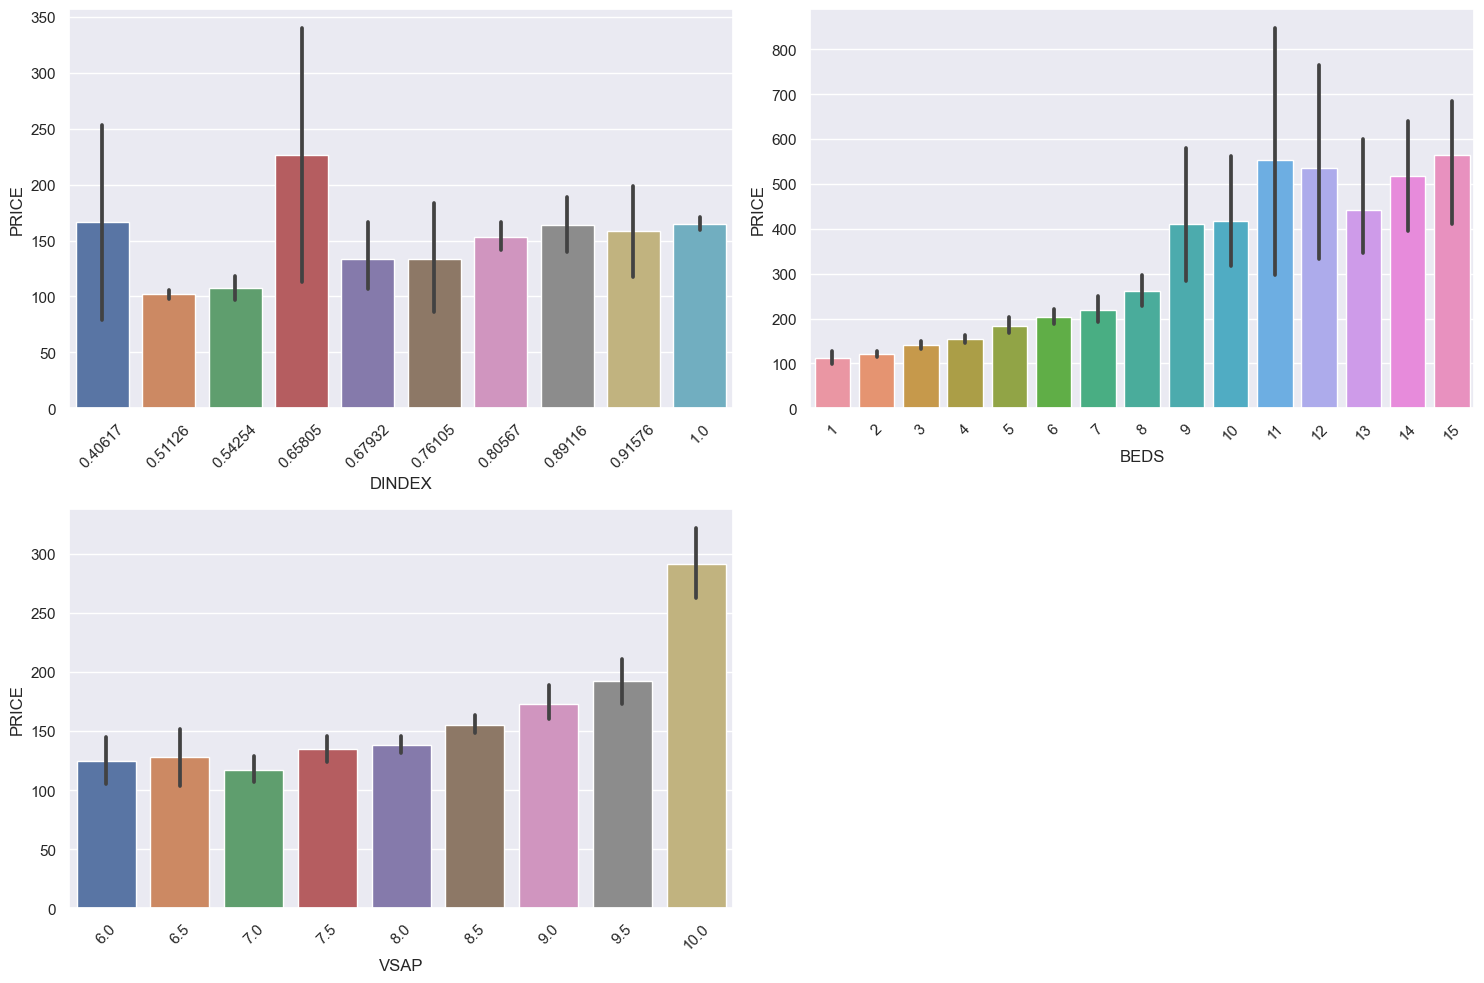

In [62]:
no_Disnumerical_features= len(dis_num)
Disnum_columns=2
Disnum_rows =math.ceil(no_Disnumerical_features/Disnum_columns)

fig, axes = plt.subplots(Disnum_rows, Disnum_columns, figsize=(15, 5*Disnum_rows))
for i, Disnum_feature in enumerate(dis_num):
    row, col = divmod(i, Disnum_columns)
    sns.barplot(data=df2, y = "PRICE", x = Disnum_feature, ax=axes[row, col])
    axes[row, col].tick_params(axis='x', labelrotation=45)

for i in range(len(dis_num), Disnum_rows * Disnum_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

INSIGHTS-
The data is skewed.

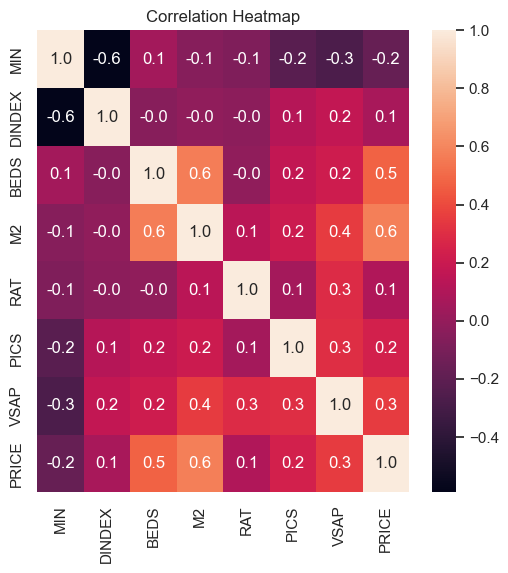

In [63]:
heatmap_cols=['MIN','DINDEX','BEDS','M2','RAT','PICS','VSAP','PRICE']
heatmap_df=df2[heatmap_cols]
plt.figure(figsize=(6,6))
sns.heatmap(heatmap_df.corr(), annot=True, fmt='.1f')

plt.title('Correlation Heatmap')
plt.show()

INSIGHTS-

Price shows the highest correlation with "BEDS" and "M2"

4. Data Visualization
    
    4.1 CountPlots for Categorial Features
    -> Distribution of Categorical Variables
    -> Variation of Categorical variables aganist Price
    
    4.2 Visualization of Numerical Features
    -> split the discrete and continuous numerical values
    -> Variation of Discrete data aganist Price
    -> Variation of Continuous Numerical data aganist Price
    
    4.3 Visualization of Label -PRICE

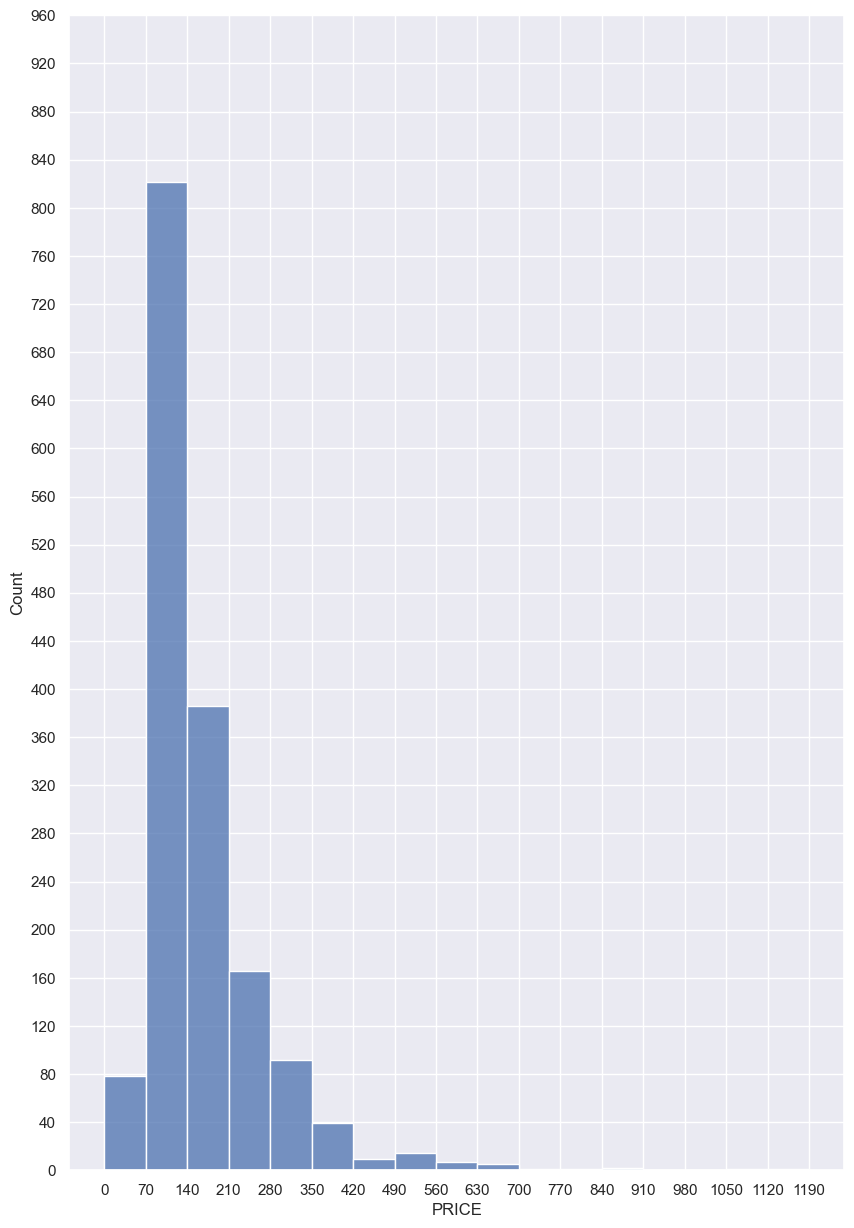

In [64]:
bins=range(0,1200,70)
bins_y=range(0,1000,40)
ax=sns.histplot(data=df2,x="PRICE",bins=bins)
sns.set(rc={'figure.figsize':(10,15)})
ax.set_xticks(bins)
ax.set_yticks(bins_y)

INSIGHTS-
The data is skewed. Therefore normal distribution method cannot be considered for outlier Removal.
-> Inter Quartile Range method can be used.

<Axes: ylabel='PRICE'>

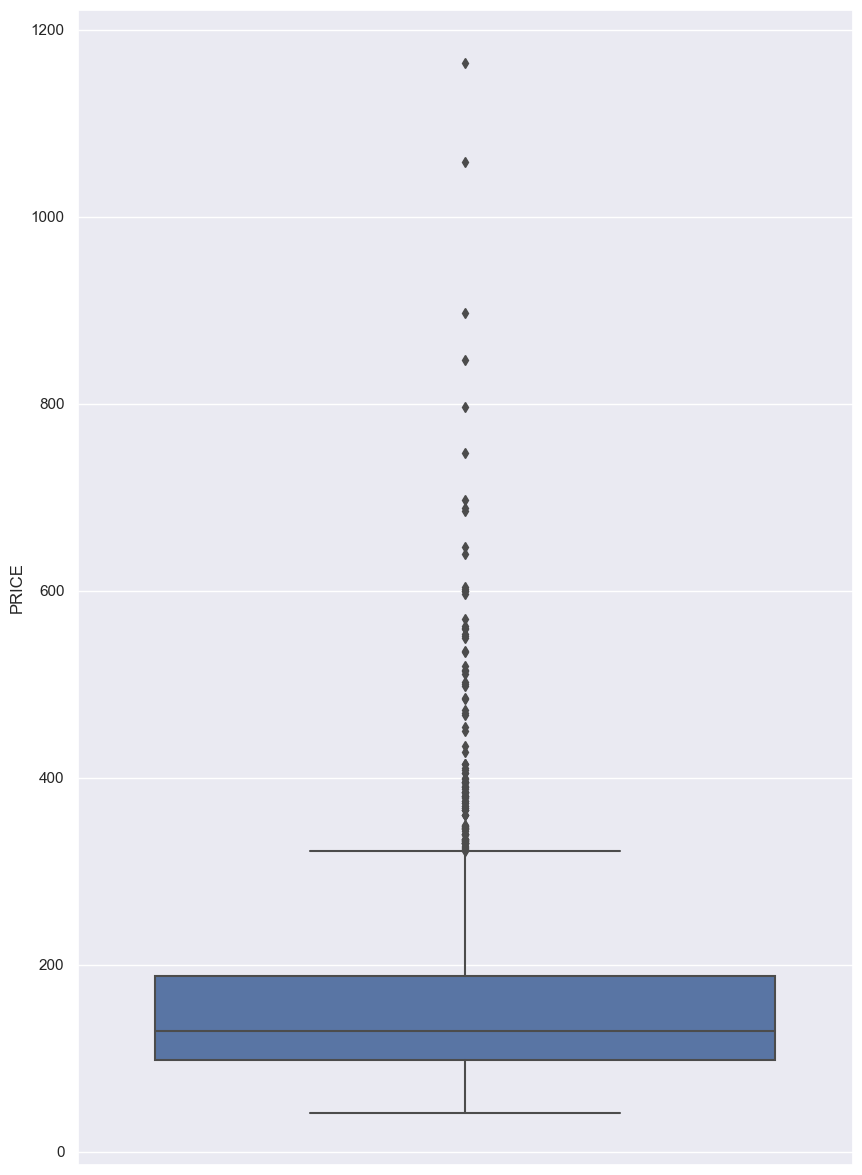

In [65]:
sns.boxplot(data=df2,y='PRICE')

INSIGHTS-
Outliers detected above the upper whisker.

In [66]:
percentile25=df1['PRICE'].quantile(0.25)
percentile75=df1['PRICE'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [67]:
outlier_data = df2[(df2['PRICE'] > upper_limit)]
df3=df2[(df2['PRICE'] < upper_limit)]

5. Outlier Detection and Removal

    5.1 Check for Skewness
    -> The data is skewed towards Rights as shown by the histogram and skewness value

In [68]:
df2['PRICE'].skew()

2.9608448887546603

5. Outlier Detection and Removal

    5.1 Check for Skewness
    -> The data is skewed towards Rights as shown by the histogram and skewness value
        Removal of outliers using Normalized distribution cannot be used. Inter Quartile method preferred.
        
   

In [69]:
(len(outlier_data)/len(df2))*100

6.96241528034504

5. Outlier Detection and Removal

    5.1 Check for Skewness
    -> The data is skewed towards Rights as shown by the histogram and skewness value
        Removal of outliers using Normalized distribution cannot be used. Inter Quartile method preferred.
        
    -> Nearly 7% of the data can be potential Outliers.
    
    5.2 Check if these data have any relation with features which showed high correlation and impact

In [70]:
high_corr= ["POOL",'M2','SE1','SE2','BEDS']
high_corr_df=outlier_data[high_corr]

In [71]:
allowed_outlier_df1 = pd.concat([
    outlier_data[outlier_data['POOL'] == 1],
    outlier_data[outlier_data['SE1'] == 1],
    outlier_data[outlier_data['SE2'] == 1]
], ignore_index=False)


5. Outlier Detection and Removal

    5.1 Check for Skewness
        -> The data is skewed towards Rights as shown by the histogram and skewness value
            Removal of outliers using Normalized distribution cannot be used. Inter Quartile method preferred.
        
       -> Nearly 7% of the data can be potential Outliers.
    
    5.2 Check if these data have any relation with features which showed high correlation and impact
            -> When the value for ['POOL', 'SE1', 'SE2'] ==1, the value is retained

In [72]:
allowed_outlier_df1


,PRICE,MIN,DINDEX,BEDS,M2,TV,WASHM,BALCONY,TERRACE,CRTYD,...,BATH,RAT,PICS,VSAP,HSWD,HSWE,LSWD,LSWE,SE1,SE2
65,394.40,2,1.00000,2,80,1,1,1,1,0,...,0,8.9,47,10.0,0,0,0,0,0,1
66,414.40,2,1.00000,3,80,1,1,1,1,0,...,0,8.9,47,10.0,0,0,0,0,0,1
67,434.40,2,1.00000,4,80,1,1,1,1,0,...,0,8.9,47,10.0,0,0,0,0,0,1
68,454.40,2,1.00000,5,80,1,1,1,1,0,...,0,8.9,47,10.0,0,0,0,0,0,1
354,688.70,19,1.00000,6,155,1,1,1,1,0,...,1,9.5,34,10.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,329.00,8,1.00000,4,130,1,1,1,1,1,...,0,9.6,36,10.0,0,0,0,0,0,1
982,330.00,14,1.00000,5,120,1,0,0,0,1,...,0,7.0,39,8.5,0,0,0,0,0,1
1194,385.00,30,0.80567,3,100,1,1,1,1,1,...,1,9.7,36,9.0,0,0,0,0,0,1
1195,395.00,30,0.80567,4,100,1,1,1,1,1,...,1,9.7,36,9.0,0,0,0,0,0,1


In [73]:
(len(outlier_data)-len(allowed_outlier_df1))/len(df2)*100


2.7110289587184226

5. Outlier Detection and Removal

    5.1 Check for Skewness
        -> The data is skewed towards Rights as shown by the histogram and skewness value
            Removal of outliers using Normalized distribution cannot be used. Inter Quartile method preferred.
        
       -> Nearly 7% of the data can be potential Outliers.
    
    5.2 Check if these data have any relation with features which showed high correlation and impact
            -> When the value for ['POOL', 'SE1', 'SE2'] ==1, the value is retained
        
            -> After considering the impact of these features, the Outliers percentage is reduced to 2.7%
            -> Removal of the 2.7% and adding the rest to the main dataframe


In [74]:
df4=pd.concat([df3,allowed_outlier_df1])

In [75]:
df=df4.copy()

6. Feature Selection


  

      6.1 Forward stepwise feature selection

In [76]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


label = 'PRICE'
features = [column for column in df.columns if column != label]

X, y = df[features], df[label]
def get_model(features):
    return make_pipeline(
        ColumnTransformer(transformers=[

            ('numerical', StandardScaler(), features)
        ]),
        LinearRegression())




We estimate the MSE of the model via 10-fold CV

In [77]:
kfold = KFold(n_splits=kfoldSplit_MACRO, shuffle=True, random_state=0)

 Variable selection with stepwise forward selection

In [78]:
class Solution:
    features = list()
    mse = float('Inf')

    def __init__(self, y):
        pred = [y.mean()] * len(y)
        self.mse = mean_squared_error(y, pred)

    def update(self, features, mse):
        if mse < self.mse:
            self.features = features
            self.mse = mse
            return True
        return False

all_features = list(features)
current_features = list() #start with empty model
best = Solution(y) #initialize solution

while current_features != all_features: #I don't want to get the model with all features, I'm trying to reducing them!
    selected_feature = None

    for feature in set(all_features) - set(current_features):
        new_features = current_features + [feature] #add one feature at a time
        mses = cross_val_score(
            estimator=get_model(new_features),
            X=X[new_features], y=y,
            cv=kfold, scoring='neg_mean_squared_error')
        mse = -np.average(mses)

        if best.update(new_features, mse):
            selected_feature = feature

    if selected_feature:
        current_features.append(selected_feature)
    else:
        break

In [79]:
featuresForwardSelection = list(best.features)
print('Selected features using Forward StepWise Method: ', end='')
print(', '.join(best.features))

Selected features using Forward StepWise Method: SE1, M2, SE2, BEDS, VSAP, LSWD, MIN, POOL, LSWE, RAT, HSWE, SND, DINDEX, BALCONY, TV, TERRACE, VIEWS


 6.2 Backward stepwise feature selection

In [80]:
#Feature selection with capped the data :: Backward Stepwise Method

label = 'PRICE'
features = [column for column in df.columns if column != label]
X, y = df[features], df[label]

def get_model(features):
    return make_pipeline(
        ColumnTransformer(transformers=[

            ('numerical', StandardScaler(), features)
        ]),
        LinearRegression())

We estimate the MSE of the model via 10-fold CV

In [81]:
kfold = KFold(n_splits=kfoldSplit_MACRO, shuffle=True, random_state=0)

Variable selection with stepwise backward selection

In [82]:
class Solution:
    features = list()
    mse = float('Inf')

    def __init__(self, y, features=None, mse=None):
        if features and mse:
            self.features = features
            self.mse = mse
        else:
            pred = [y.mean()] * len(y)
            self.features = list()
            self.mse = mean_squared_error(y, pred)

    def update(self, features, mse):
        if mse < self.mse:
            self.features = features
            self.mse = mse
            return True
        return False

current_features = list(features)
best = Solution(
    y=y,
    features=current_features,
    mse=-np.average(
        cross_val_score(
            estimator=get_model(current_features),
            X=X, y=y, cv=kfold,
            scoring='neg_mean_squared_error')))

while len(current_features) > 0: #I want to remove features. I stop when the model has 1 feature left
    removed_feature = None

    for feature in current_features:
        new_features = [f for f in current_features if f != feature]
        mses = cross_val_score(
            estimator=get_model(new_features),
            X=X[new_features], y=y, cv=kfold,
            scoring='neg_mean_squared_error')
        mse = -np.average(mses)

        if best.update(new_features, mse):
            removed_feature = feature

    if removed_feature:
        current_features.remove(removed_feature)
    else:
        break

In [83]:
featuresBackwardSelection = list(best.features)
print('Selected features using Backward Stepwise Method: ', end='')
print(', '.join(best.features))
print(len(featuresBackwardSelection))
#print(len(featuresComplete))

Selected features using Backward Stepwise Method: MIN, DINDEX, BEDS, M2, TV, BALCONY, TERRACE, CRTYD, VIEWS, SND, PETS, POOL, RAT, PICS, VSAP, HSWD, HSWE, LSWD, LSWE, SE1, SE2
21


# 7. Model Evaluation

7.1 Variables, and Data Structures

In [84]:
#Setting the target variable, does not change throught tests
targetVar =df[targetVar_MACRO]

#Using all features to predict the price
featuresComplete= df.columns.drop(targetVar_MACRO)

#List of features to test the model with all features, backward selection features and forward selection features
featureSelectionMethods = [featuresComplete, featuresBackwardSelection,featuresForwardSelection]
featureNames= ["All Features", "Backward Selection Features","Forward Selection Features"]

#List of models to test
modelTypes = [LinearRegression(), Lasso(), Ridge()]

#Dictionary to store the best model based on MSE and R2
bestStatsModelDict={}

#Dictionary to store all MSE and R2 per model type and feature selection method; used for loop to make code more concise
allStatsModelDict = {
    str(modelType): {
        featureName: {
            "MSE": 0,
            "R2": 0
        }
        for featureName in featureNames
    }
    for modelType in modelTypes
}

7.2 Functions

In [85]:
#Get the MSE and R2 for determining model performance
def getModelMSEAndR2(modelType,features_train, features_test, targetVar_train, targetVar_test):

    #Applying KFold to split the data into 10 folds to perform cross validation and avoid overfitting
    kfold = KFold(n_splits=kfoldSplit_MACRO, shuffle=True, random_state=0)

    #Creating the model via a pipeline that scales the data, adds polynomial features for Linear regression; additionally it performs grid search to find the best alpha value for Lasso and Ridge regression
    if str(modelType) == "LinearRegression()":
        model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
    else:
        model = make_pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=2),
            GridSearchCV(estimator=modelType, param_grid=dict(alpha=np.logspace(alphaStart_MACRO, alphaEnd_MACRO, alphaSteps_MACRO)), cv=kfold, scoring='neg_mean_squared_error') #4 mins to run using step 50
            )

    #Fitting the model
    model.fit(features_train, targetVar_train)

    # Make a prediction on the test set
    targetVar_pred = model.predict(features_test)

    #  Evaluate the prediction accuracy of the model using Mean Square Error and R2
    mse = mean_squared_error(targetVar_test, targetVar_pred)
    r2 = r2_score(targetVar_test, targetVar_pred)

    return mse , r2


In [86]:
#Function to get the MSE and R2 for all models and feature selection methods as well as the best MSE and R2 scores per model type
def modelStats(modelType, featureSelectionMethods, featureSelectionMethodNames, targetVar, bestStatsModelDict, allStatsModelDict):
    #Dictionary to store the best model based on MSE and R2
    bestStatsDict = {"MSE": ["", sys.maxsize], "R2":["",-sys.maxsize]}

    #Using ranges to find the best alpha value for Lasso regression based on different feature selection methods
    for index, featureSelectionMethod in enumerate(featureSelectionMethods):
        features = df[featureSelectionMethod]
        #Splitting int train and test data (80-20)
        features_train, features_test, targetVar_train, targetVar_test = train_test_split(features, targetVar, test_size=0.20, random_state=1)

        modelMSE, modelR2= getModelMSEAndR2(modelType,features_train, features_test, targetVar_train, targetVar_test)

        #Storing all MSE and R2 per model type and feature selection method
        allStatsModelDict[str(modelType)][featureNames[index]]["MSE"] = modelMSE
        allStatsModelDict[str(modelType)][featureNames[index]]["R2"] = modelR2

        #Finding the best model based on MSE and R2
        if modelMSE < bestStatsDict["MSE"][bestStatTestVal_MACRO]:
            bestStatsDict["MSE"][bestFeatureMethod_MACRO] = featureSelectionMethodNames[index]
            bestStatsDict["MSE"][bestStatTestVal_MACRO] = modelMSE

        if modelR2 > bestStatsDict["R2"][bestStatTestVal_MACRO]:
            bestStatsDict["R2"][bestFeatureMethod_MACRO] = featureSelectionMethodNames[index]
            bestStatsDict["R2"][bestStatTestVal_MACRO] = modelR2

    #Storing best MSE and R2 per model type and feature selection method
    bestStatsModelDict[str(modelType)] = bestStatsDict

7.3 Code Execution

In [87]:
#Running the model for Linear, Lasso and Ridge regression
for modelType in modelTypes:
    modelStats(modelType, featureSelectionMethods, featureNames, targetVar,bestStatsModelDict,allStatsModelDict)

7.4 Plot and Result Visualization

In [88]:
#Printing the best MSE and R2 for each model and feature selection method
print("Best MSE and R2 values and feature selection method for each model \n")
for model, stats in bestStatsModelDict.items():
    for stat, values in stats.items():
        print(model, " -> ",values[bestFeatureMethod_MACRO], " , ", stat, " = ",values[bestStatTestVal_MACRO])
    print("\n")

Best MSE and R2 values and feature selection method for each model 

LinearRegression()  ->  Backward Selection Features  ,  MSE  =  2303.6145042866187
LinearRegression()  ->  Backward Selection Features  ,  R2  =  0.7193138592637032


Lasso()  ->  Forward Selection Features  ,  MSE  =  1980.3120528807133
Lasso()  ->  Forward Selection Features  ,  R2  =  0.7587069596313404


Ridge()  ->  Forward Selection Features  ,  MSE  =  1995.649754573871
Ridge()  ->  Forward Selection Features  ,  R2  =  0.756838122511238




In [89]:
#Printing all model/feature selection method combinations
pprint.pprint(allStatsModelDict)


{'Lasso()': {'All Features': {'MSE': 2312.3454952030133,
                              'R2': 0.7182500232179732},
             'Backward Selection Features': {'MSE': 2125.9485873810763,
                                             'R2': 0.7409617350101858},
             'Forward Selection Features': {'MSE': 1980.3120528807133,
                                            'R2': 0.7587069596313404}},
 'LinearRegression()': {'All Features': {'MSE': 2.9330177683761495e+26,
                                         'R2': -3.5737639113860024e+22},
                        'Backward Selection Features': {'MSE': 2303.6145042866187,
                                                        'R2': 0.7193138592637032},
                        'Forward Selection Features': {'MSE': 2442.3432795558497,
                                                       'R2': 0.7024103172574627}},
 'Ridge()': {'All Features': {'MSE': 2060.5029838824685,
                              'R2': 0.7489360179642128},
         

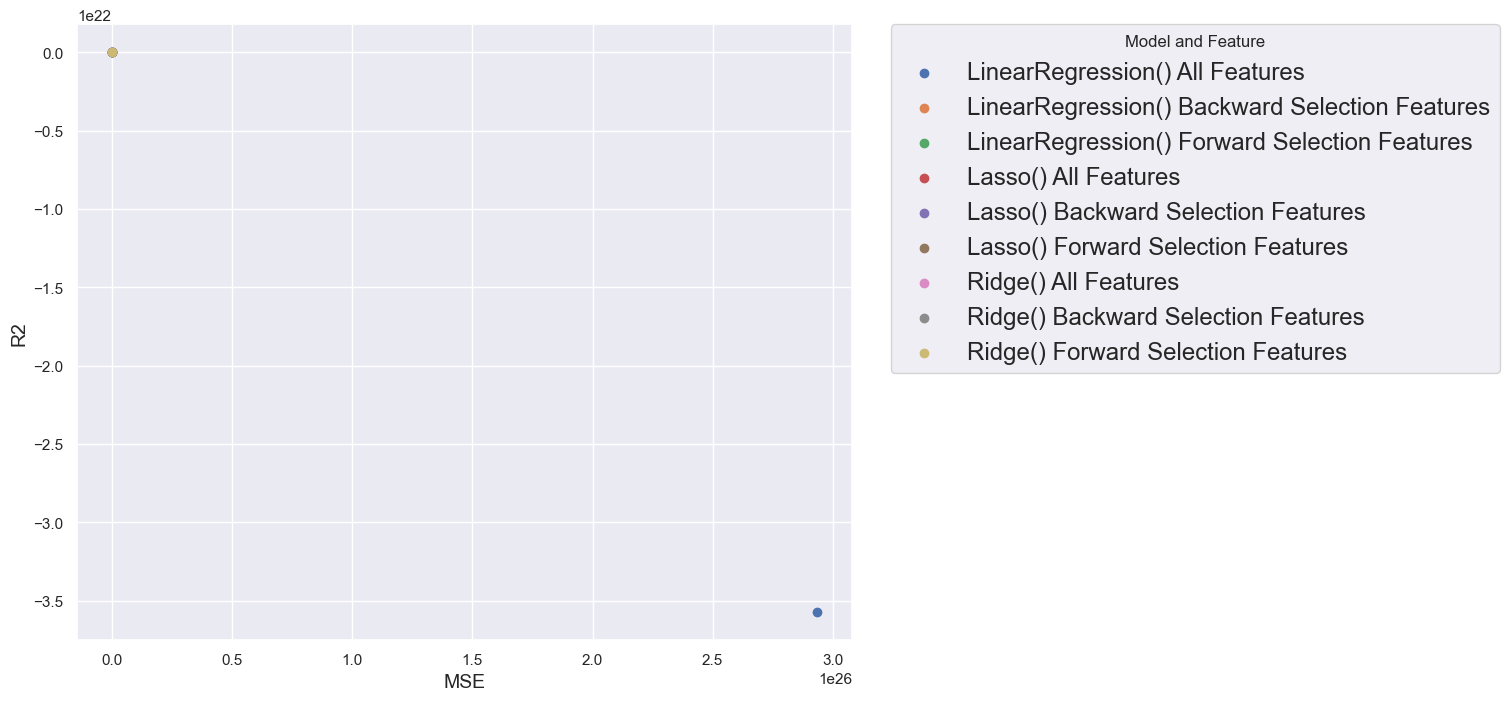

In [90]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Assuming allStatsModelDict is defined
for modelType, featureDict in allStatsModelDict.items():
    for featureName, statsDict in featureDict.items():
        plt.scatter(statsDict["MSE"], statsDict["R2"], label=f'{modelType} {featureName}')


plt.xlabel('MSE', fontsize=14)
plt.ylabel('R2', fontsize=14)

# Place legend outside the plot, increase font size and adjust box aspect
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-large', borderaxespad=0., title="Model and Feature")

plt.show()